In [4]:
import pandas as pd
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [7]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


In [10]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features+['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


<ipython-input-14-ba2e4bebe8be>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


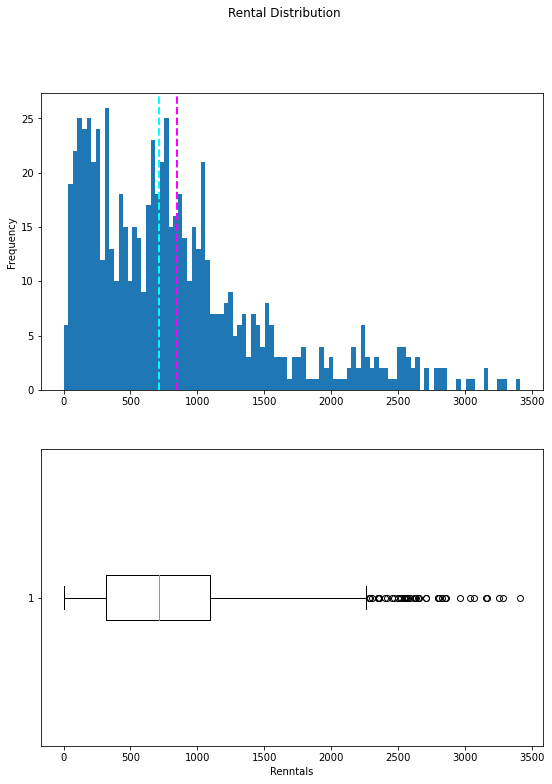

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

label = bike_data['rentals']

fig, ax=plt.subplots(2, 1, figsize=(9, 12))

ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Renntals')

fig.suptitle('Rental Distribution')
fig.show()

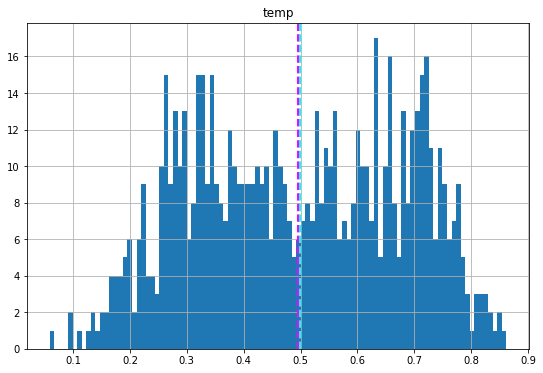

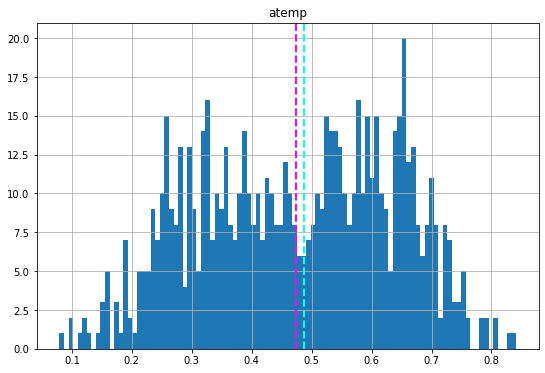

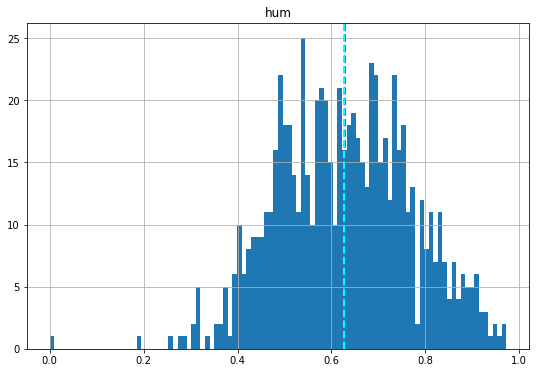

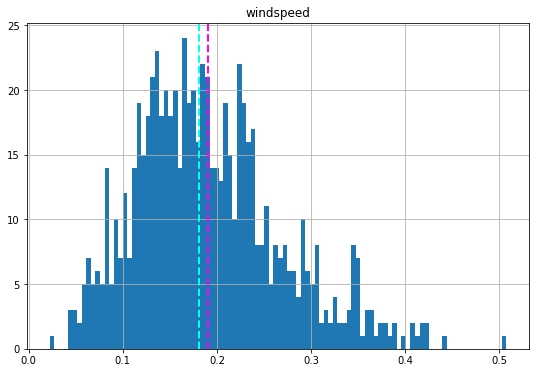

In [16]:
for col in numeric_features:
    fig=plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

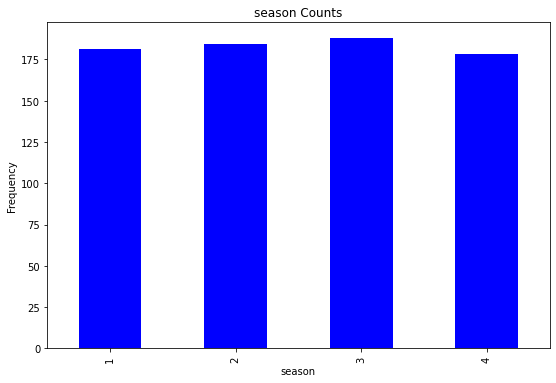

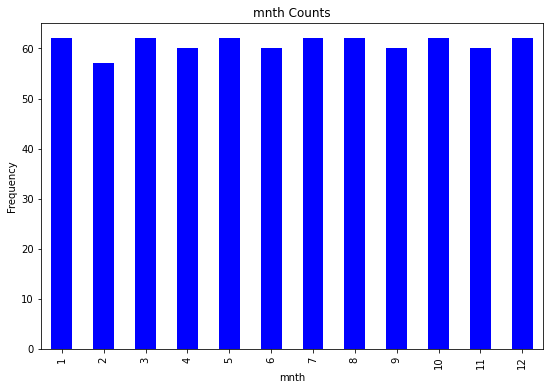

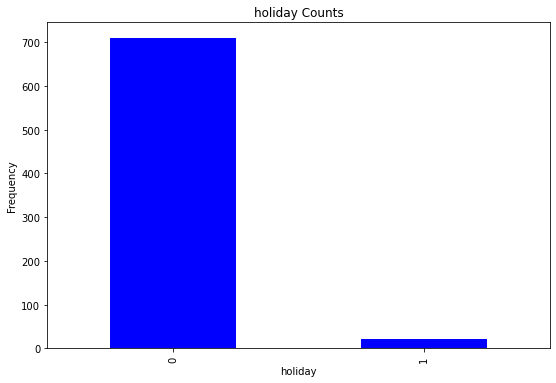

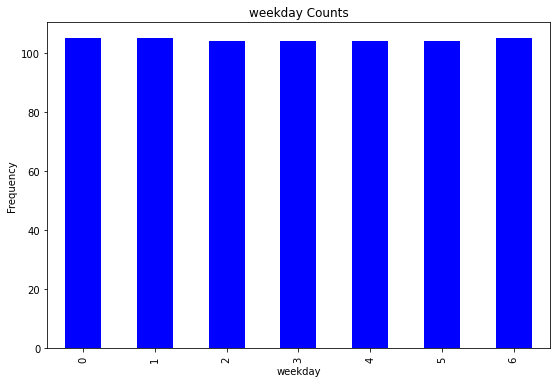

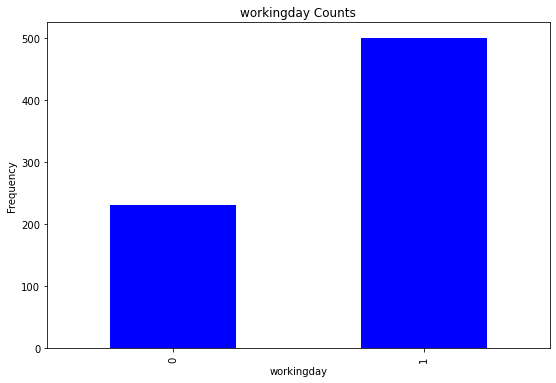

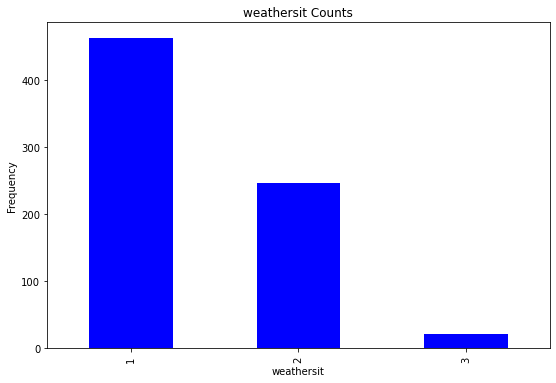

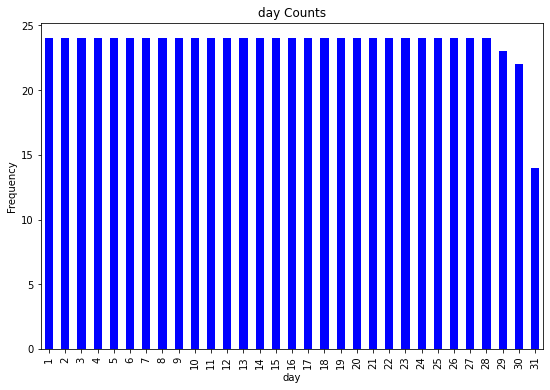

In [21]:
import numpy as np

categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='blue')
    ax.set_title(col+' Counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

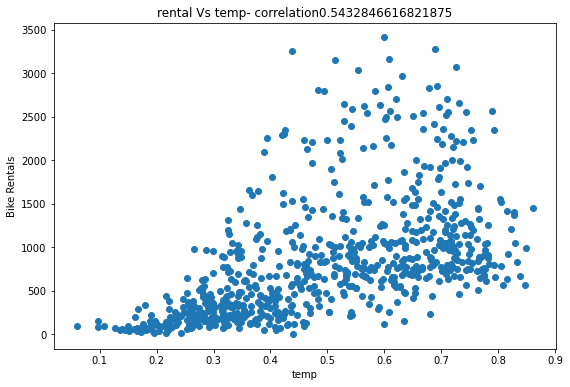

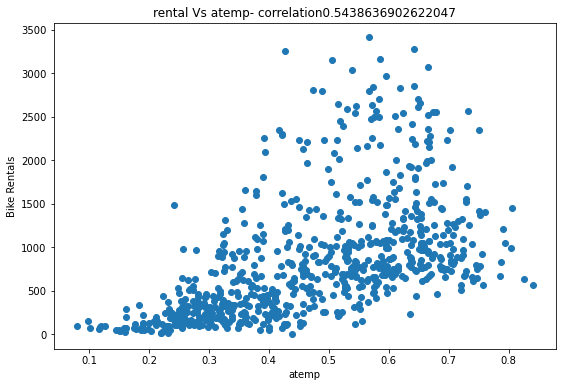

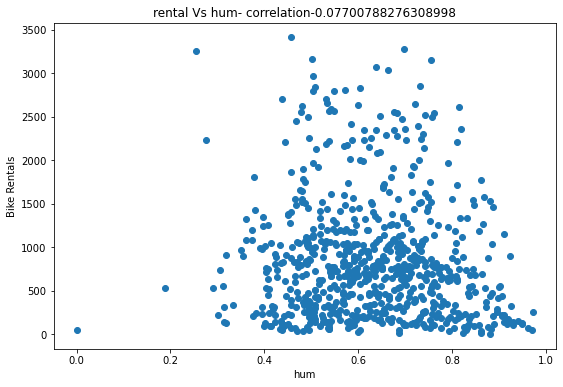

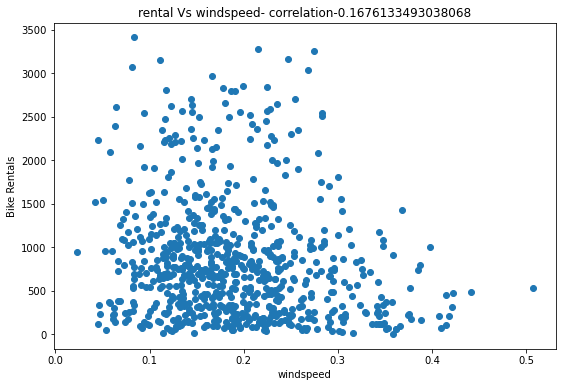

In [23]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax=fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rental Vs '+col+'- correlation'+str(correlation))
plt.show()

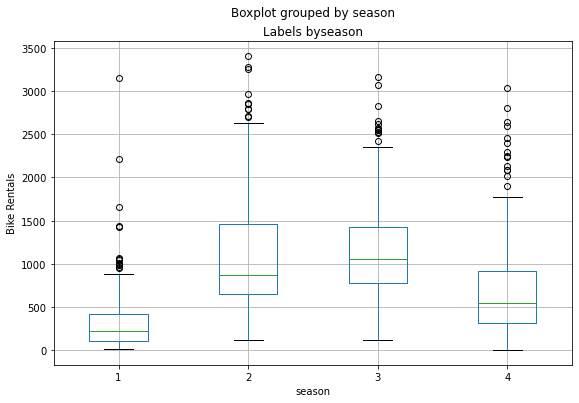

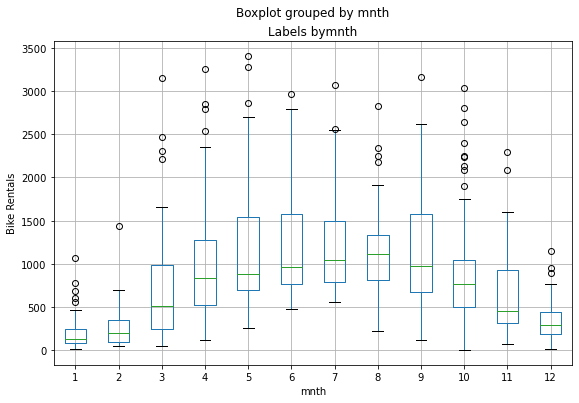

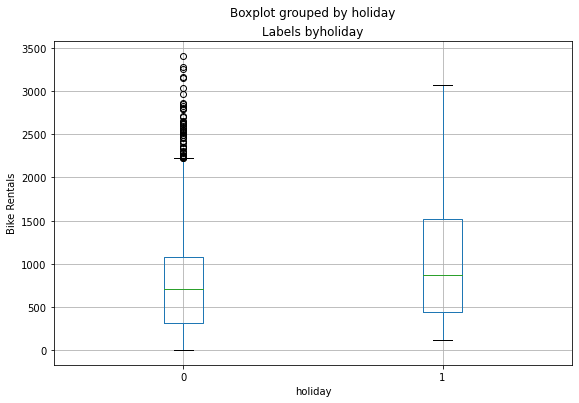

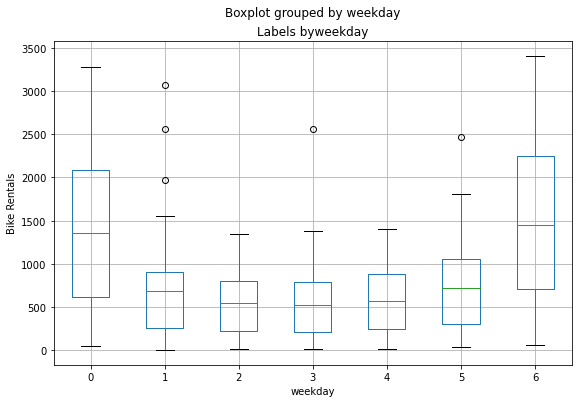

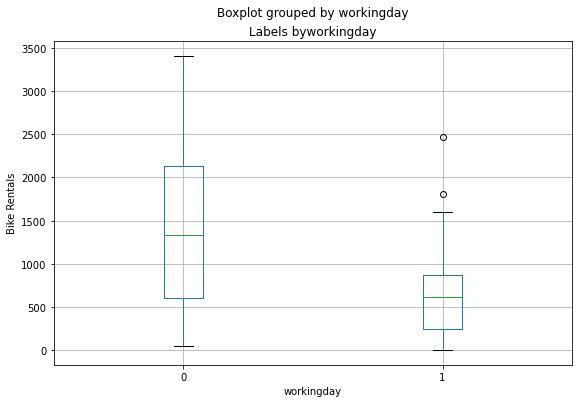

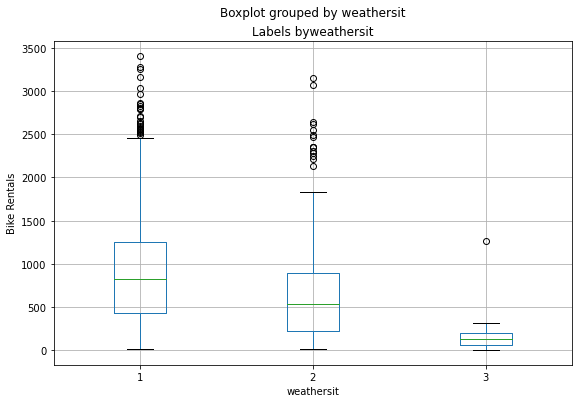

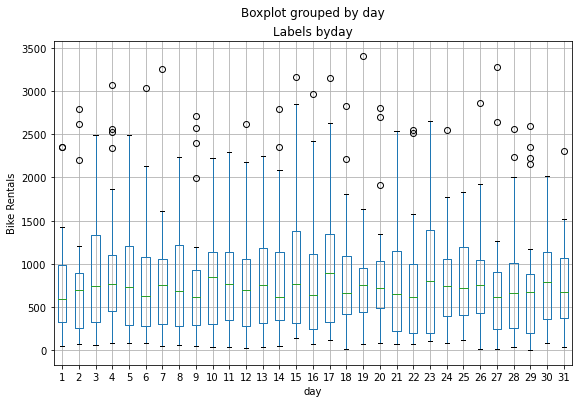

In [26]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column='rentals', by=col, ax=ax)
    ax.set_title('Labels by'+col)
    ax.set_ylabel('Bike Rentals')
plt.show()

In [27]:
X, Y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data[['rentals']].values
print('Feature:',X[:10], '\nLabels:',Y[:10], sep='\n')

Feature:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        0

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

print('Training Set:%d rows\nTest Set:%dcolumns'%(X_train.size, X_test.size))

Training Set:5110 rows
Test Set:2200columns


In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=False).fit(X_train, Y_train)

print(model)

LinearRegression()


In [35]:
import numpy as np
prediction = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels:', np.round(prediction)[:10])
print('Actual Labels:', Y_test[:10])

Predicted labels: [[1896.]
 [1184.]
 [1007.]
 [ -28.]
 [ 314.]
 [ 385.]
 [ 475.]
 [ 590.]
 [1476.]
 [ -22.]]
Actual Labels: [[2418]
 [ 754]
 [ 222]
 [  47]
 [ 244]
 [ 145]
 [ 240]
 [ 555]
 [3252]
 [  38]]


TypeError: expected 1D vector for x

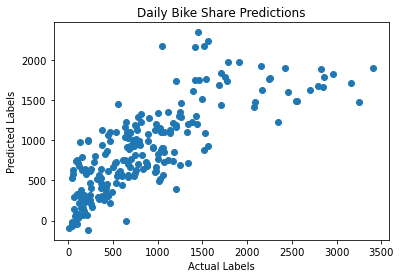

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(Y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(Y_test, prediction , 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test), color='magenta')
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, prediction)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(Y_test, prediction)
print('R2:', r2)

MSE: 201972.55947035612
RMSE: 449.4135728595167
R2: 0.6040454736919186


In [48]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression(normalize=False))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (Y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', LinearRegression())])


Predicted labels:  [[1694.]
 [ 985.]
 [ 894.]
 [-303.]
 [ 150.]
 [ 150.]
 [ 581.]
 [ 474.]
 [1659.]
 [ -77.]]
Actual labels:  [[2418]
 [ 754]
 [ 222]
 [  47]
 [ 244]
 [ 145]
 [ 240]
 [ 555]
 [3252]
 [  38]]
MSE: 174159.77993961138
RMSE: 417.3245498884668
R2: 0.6585706823305876


TypeError: expected 1D vector for x

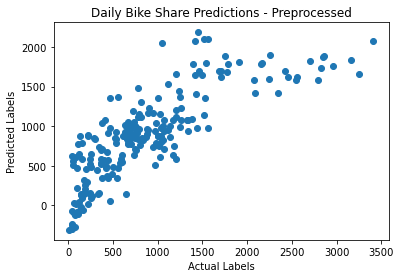

In [49]:
prediction = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(prediction)[:10])
print('Actual labels: ' ,Y_test[:10])

mse = mean_squared_error(Y_test, prediction)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(Y_test, prediction)
print("R2:", r2)

plt.scatter(Y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(Y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test), color='magenta')
plt.show()

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', GradientBoostingRegressor())])


# train a logistic regression model on the training set
model = pipeline.fit(X_train, (Y_train))
print (model)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 174159.77993961138
RMSE: 417.3245498884668
R2: 0.6585706823305876


TypeError: expected 1D vector for x

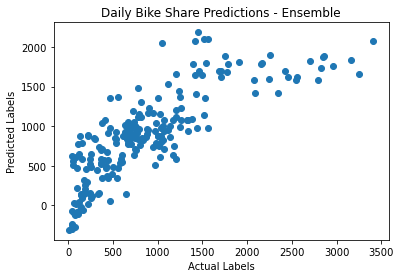

In [51]:
predictions = model.predict(X_test)

mse = mean_squared_error(Y_test, prediction)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(Y_test, prediction)
print("R2:", r2)

plt.scatter(Y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Ensemble')
z = np.polyfit(Y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test), color='magenta')
plt.show()

In [52]:
import joblib

filename = 'bike-share.pkl'
joblib.dump(model, filename)

['bike-share.pkl']

In [53]:
loaded_model = joblib.load(filename)

X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 122 rentals
